# Sequential graph with multi node

Sequential Graph

    • Multiple nodes sequentially process and update different part of the state.
    • Connect nodes together in a graph.
    • See how the state is transformed step-by-step.

In [6]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph
from IPython.display import Image, display

In [17]:
class AgentState(TypedDict):
    name: str
    age: int
    final: str

In [18]:
def name_node(state: AgentState) -> AgentState:
    """The first node state adding name to the message."""
    
    state['final'] = f"Hi {state['name']}! "
    return state

def age_node(state: AgentState) -> AgentState:
    """the age node state adding age to the message."""

    state['final'] = state['final'] + f"Your age is {state['age']} years old."
    return state


In [19]:
graph = StateGraph(AgentState)
graph.add_node("first node", name_node)
graph.add_node("second node", age_node)
graph.set_entry_point("first node")
graph.add_edge("first node", "second node")
graph.set_finish_point("second node")

app = graph.compile()

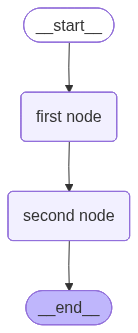

In [20]:
display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
result = app.invoke({'name' : 'Gaurav', 'age' : 29})
result['final']

'Hi Gaurav! Your age is 29 years old.'